# Polynomial Regression with SciKit-Learn

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
poly_features = polynomial_converter.fit_transform(X)

## Train | Test Split


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Model for fitting on Polynomial Data


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression(fit_intercept=True)

### Fit/Train the Model on the training data



In [13]:
model.fit(X_train,y_train)

LinearRegression()

### Calculate Performance on Test Set



In [14]:
test_predictions = model.predict(X_test)

### Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [17]:
MAE

0.4896798044803558

In [18]:
MSE

0.44175055104033756

In [19]:
RMSE

0.664643175726899

In [20]:
df['sales'].mean()

14.0225

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

---
---
## Choosing a Model

### Adjusting Parameters

Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. 

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [21]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

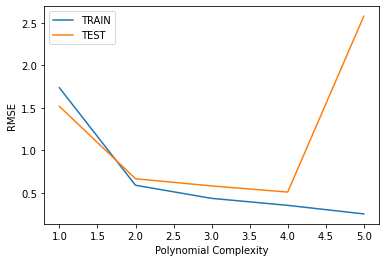

In [22]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

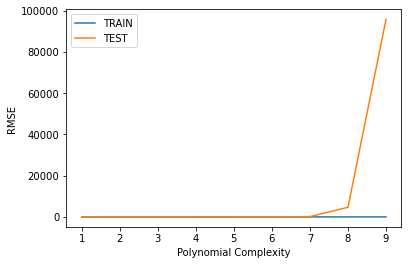

In [23]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

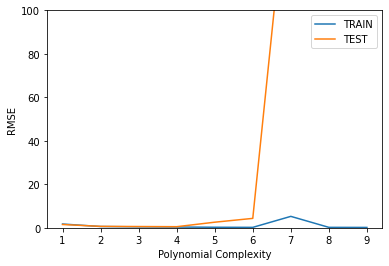

In [24]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

## Finalizing Model Choice



In [25]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [26]:
final_model = LinearRegression()

In [27]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

### Saving Model and Converter

In [28]:
from joblib import dump, load

In [29]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [30]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Predictions

### Prediction on New Data

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [31]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [32]:
campaign = [[149,22,12]]

In [33]:
campaign_poly = loaded_poly.transform(campaign)

In [34]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [35]:
final_model.predict(campaign_poly)

array([14.64501014])

-----
---